In [1]:
import numpy
from PIL import Image
import pytesseract

from matplotlib.pyplot import imshow
%matplotlib inline
import cv2


Slicing the image:

Splitting image to tiles of MxN pixels (assuming im is numpy.ndarray):

In [2]:
image_path='/Users/jamesmoss/Documents/GitHub/SideProjects/Best_WWF_Words/IMG_2574.jpeg'
im = numpy.asarray(Image.open(image_path))

M = im.shape[0]//15
N = im.shape[1]//15

tiles = [im[x:x+M,y:y+N] for x in range(0,im.shape[0],M) for y in range(0,im.shape[1],N)]

img = Image.fromarray(numpy.uint8(im))


In [3]:
tile_images=[]
for tile in tiles:
    im = Image.fromarray(numpy.uint8(tile))

In [4]:
#https://opencv-python-tutroals.readthedocs.io/en/latest/
#py_tutorials/py_imgproc/py_thresholding/py_thresholding.html#thresholding

#https://stackoverflow.com/questions/19268648/using-tesseract-to-recognize-license-plates/19418347#19418347
#http://www.tammo80.nl/weblog/?p=1396
#https://stackoverflow.com/questions/384759/how-to-convert-a-pil-image-into-a-numpy-array

# from PIL import Image
# import numpy as np
# im = Image.open('1.jpg')
# im2arr = np.array(im) # im2arr.shape: height x width x channel
# arr2im = Image.fromarray(im2arr)


In [5]:
len(tiles)

256

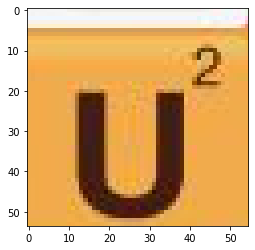

In [6]:
imshow(tiles[90])
# imshow(img)

In [7]:
# im = Image.fromarray(numpy.uint8(tiles[233]))
print(pytesseract.image_to_string(tiles[90]))

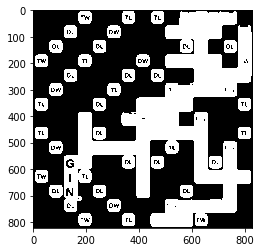

In [8]:
imge = cv2.imread(image_path,0)
imge = cv2.medianBlur(imge,5)
imge = cv2.bitwise_not(imge)


ret2,th2 = cv2.threshold(imge,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow(th2,'gray')

# th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
# imshow(th2)

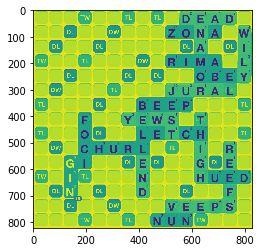

In [18]:
img = cv2.imread(image_path,0)
# img = cv2.bitwise_not(img)

imshow(img)


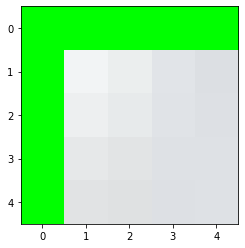

In [20]:

im =  cv2.imread(image_path)
im = cv2.resize(im,(800,800))

imgheight=im.shape[0]
imgwidth=im.shape[1]

y1 = 0
M = imgheight//15
N = imgwidth//15

for y in range(0,imgheight,M):
    for x in range(0, imgwidth, N):
        y1 = y + M
        x1 = x + N
        tiles = im[y:y+M,x:x+N]
        cv2.rectangle(im, (x, y), (x1, y1), (0, 255, 0))
#         cv2.imwrite("save/" + str(x) + '_' + str(y)+".png",tiles)
        imshow(tiles)

# cv2.imwrite("asas.png",im)
